<div style='float: right'><img src='pic/norinori.png'/></div>

## <div id='norinori' />のりのり

In [1]:
#!pip3 install pulp ortoolpy
%matplotlib inline
import pandas as pd, matplotlib.pyplot as plt
from pulp import LpProblem, lpSum, value
from ortoolpy import addbinvars
data = """\
ABBBC
ADDBC
EDBBB
EEEEE
EEEEE""".splitlines()

### 問題
* 盤面のいくつかのマスを黒くぬります
* 黒マスは必ずタテかヨコにちょうど２つだけぬります
* 太線で区切られた各部分には、黒マスが２つずつ入ります

### 変数
* v：黒かどうか (1)

### 制約
* 各部分内の黒は2つ (2)
* あるマスが黒なら、周りは1つだけ黒 (3)

In [2]:
ni, nj = len(data), len(data[0])
a = pd.DataFrame([(i,j,data[i][j]) for i in range(ni)
    for j in range(nj)], columns=list('行列字'))
a['Var'] = addbinvars(len(a))
a[:2]

,行,列,字,Var
0,0,0,A,v000001
1,0,1,B,v000002


In [3]:
m = LpProblem()
for _,r in a.iterrows():
    e = lpSum(a.query(f'abs(行-{r.行})+abs(列-{r.列})==1').Var)
    m += e >= r.Var
    m += e <= 1+(len(e)-1)*(1-r.Var)
for g,v in a.groupby('字'):
    m += lpSum(v.Var) == 2
m.solve()

1

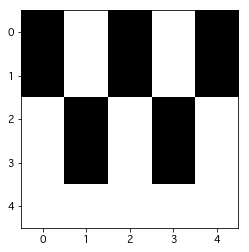

In [4]:
a['Val'] = a.Var.apply(value)
plt.imshow((a.Val<0.5).values.reshape(ni,nj), cmap='gray', interpolation='none');